In [98]:
what_were_covering = {1: "Data (prepare and load",
                      2: "build model",
                      3: "fit the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


In [99]:
import torch
from torch import nn #building blocks for Neural Networks
import matplotlib.pyplot as plt


In [100]:
# Data (preparing and loading)
# Y = a + bX
weight = 0.7   #b
bias = 0.3     #a

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

# (tensor([[0.0000],
#          [0.0200],
#          [0.0400],
#          [0.0600],
#          [0.0800]]),
#  tensor([[0.3000],
#          [0.3140],
#          [0.3280],
#          [0.3420],
#          [0.3560]]))

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [101]:
len(X), len(y)
#(50, 50)

(50, 50)

In [102]:
# Create a training and test set with our data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] #40 training samples of X and y
X_test, y_test = X[train_split:], y[train_split:] #10 testing samples of X and y

len(X_train), len(y_train), len(X_test), len(y_test)
#(40, 40, 10, 10)

(40, 40, 10, 10)

In [103]:
import matplotlib.pyplot as plt

# Function to visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    #Plots training data, test data, and compares predictions

    #Plot training data in blue
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    #Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

    #Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend(prop={"size": 14})

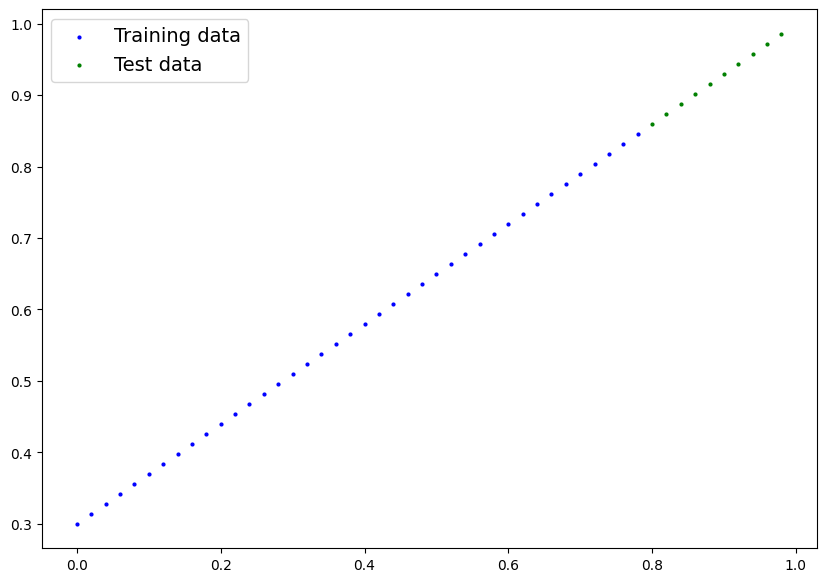

In [104]:
plot_predictions()

In [105]:
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits nn.Module
    def __init__(self):
        super().__init__()
        #Start with RANDOM numbers and continually update these to fit the data
        #we set the weights and bias with randn (random number)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # y = m*x + b

### Lets check what is inside our model

In [106]:
#Create a random seed to ensure similar values from our model every time
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())
# [Parameter containing:
#  tensor([0.3367], requires_grad=True),
#  Parameter containing:
#  tensor([0.1288], requires_grad=True)]

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [107]:
# List named parameters
model_0.state_dict()
#OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [108]:
#Our goal is to make these match
weight, bias
#(0.7, 0.3)

(0.7, 0.3)

In [109]:
X_test, y_test
# (tensor([[0.8000],   #  tensor([[0.8600],
#          [0.8200],   #          [0.8740],
#          [0.8400],   #          [0.8880],
#          [0.8600],   #          [0.9020],
#          [0.8800],   #          [0.9160],
#          [0.9000],   #          [0.9300],
#          [0.9200],   #          [0.9440],
#          [0.9400],   #          [0.9580],
#          [0.9600],   #          [0.9720],
#          [0.9800]]), #          [0.9860]]))

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [110]:
#Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds
# 0,0.39816
# 1,0.40490
# 2,0.41163
# 3,0.41836
# 4,0.42510
# 5,0.43183
# 6,0.43856
# 7,0.44530
# 8,0.45203
# 9,0.45877


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

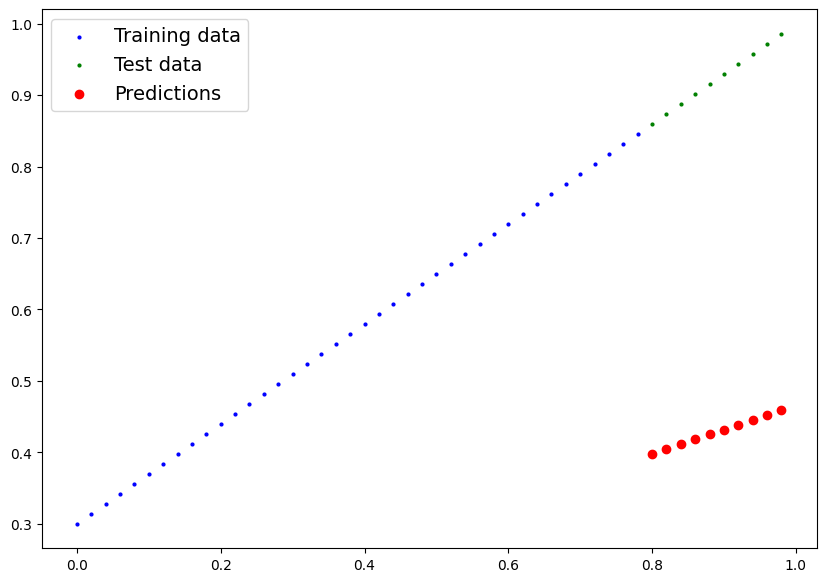

In [111]:
plot_predictions(predictions=y_preds)

In [112]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [113]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer. Requires parameters, e.g. weight and bias
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate

In [114]:
# One loop through the data
epochs = 1

#1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode. Sets all parameters that have gradients to require gradients
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train) #learn patterns on the training data

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()  # think of as zero'ing out the optimizer

    # 4. Perform backpropagation with respect to the models parameters
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    # Sets the model to evalutation mode. Turns off gradient tracking
    # model_0.eval()

In [115]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])